# Table of Contents
 <p><div class="lev1 toc-item"><a href="#OSMI-Mental-Health-In-Tech-Survey-2016-:-Inference-on-Cluster-Analysis" data-toc-modified-id="OSMI-Mental-Health-In-Tech-Survey-2016-:-Inference-on-Cluster-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OSMI Mental Health In Tech Survey 2016 : Inference on Cluster Analysis</a></div><div class="lev1 toc-item"><a href="#Recap" data-toc-modified-id="Recap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recap</a></div><div class="lev1 toc-item"><a href="#Model-Study" data-toc-modified-id="Model-Study-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Study</a></div><div class="lev2 toc-item"><a href="#Class-Descriptions" data-toc-modified-id="Class-Descriptions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Class Descriptions</a></div><div class="lev1 toc-item"><a href="#Relationship-of-Clusters-with-Demographics" data-toc-modified-id="Relationship-of-Clusters-with-Demographics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Relationship of Clusters with Demographics</a></div><div class="lev2 toc-item"><a href="#Simple-Modeling" data-toc-modified-id="Simple-Modeling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Simple Modeling</a></div><div class="lev2 toc-item"><a href="#Inference-and-Preditions" data-toc-modified-id="Inference-and-Preditions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Inference and Preditions</a></div><div class="lev3 toc-item"><a href="#Location-Effect" data-toc-modified-id="Location-Effect-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Location Effect</a></div><div class="lev3 toc-item"><a href="#Age-and-Diagnosis-Effect" data-toc-modified-id="Age-and-Diagnosis-Effect-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Age and Diagnosis Effect</a></div><div class="lev3 toc-item"><a href="#Company-Size" data-toc-modified-id="Company-Size-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Company Size</a></div><div class="lev3 toc-item"><a href="#Gender" data-toc-modified-id="Gender-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Gender</a></div><div class="lev3 toc-item"><a href="#Point-Predictions" data-toc-modified-id="Point-Predictions-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Point Predictions</a></div>

# OSMI Mental Health In Tech Survey 2016 : Inference on Cluster Analysis

_By [Michael Rosenberg](mmrosenb@andrew.cmu.edu)._

In [2]:
#imports
library(poLCA)
library(nnet)
library(tree)

#constants
sigLev = 3
percentMul = 100
options(warn=-1)

In [3]:
#load in data
inferenceFrame = read.csv("../../data/processed/clusterData_inference.csv")
finalMod.lcm = readRDS("../../models/finalClusterModel.rds")

# Recap

In our [previous step](clusterAnalysis_modelSelection.ipynb),  we selected our final cluster model using a $5$-fold cross-validation procedure on log-likelihood. This left us with a latent class model with $3$ classes over several variables that define perception of mental health support in the workplace.

# Model Study

In [4]:
priorFrame = data.frame(class = c("Class 1","Class 2","Class 3"),
                        prior = signif(finalMod.lcm$P,sigLev))
priorFrame

class,prior
Class 1,0.261
Class 2,0.243
Class 3,0.496


_Table 1: Our prior distribution over our classes._

We see that Class $3$ is more frequent than the other two, and Class $2$ is the least frequent of the three in our estimates. That being said, these classes are rather close together in prior, which suggests that we have relatively balanced classes.

In [7]:
displayTable <- function(givenMod,varName){
    #helper for producing table
    #first, get discrete encoding
    dEncodeFilename = paste0("../../data/preprocessed/discreteEncodings/",
                             varName,".csv")
    dEncodeFrame = read.csv(dEncodeFilename)
    #get levels
    dEncodeLevels = dEncodeFrame$level
    givenModTable = givenMod$probs[[varName]]
    givenModTable = signif(givenModTable,sigLev)
    colnames(givenModTable) = dEncodeLevels
    #then export
    return(givenModTable)
}

In [8]:
finalMod.lcm$probs

$empPrimTech
              Pr(1)     Pr(2)
class 1:  0.8124234 0.1875766
class 2:  0.7408225 0.2591775
class 3:  0.7190431 0.2809569

$empProvideMHB
                Pr(1)      Pr(2)     Pr(3)     Pr(4)
class 1:  0.137599956 0.27236251 0.1170898 0.4729477
class 2:  0.006397177 0.01619933 0.8529976 0.1244059
class 3:  0.061740091 0.25700101 0.4349935 0.2462654

$knowMHB
                 Pr(1)      Pr(2)     Pr(3)     Pr(4)
class 1:  2.277479e-01 0.01003213 0.3939088 0.3683111
class 2:  1.627407e-27 0.57900669 0.2904521 0.1305412
class 3:  1.054428e-01 0.24914881 0.2697361 0.3756722

$empDiscMH
              Pr(1)     Pr(2)      Pr(3)
class 1:  0.8053862 0.1231868 0.07142699
class 2:  0.3984846 0.4881748 0.11334059
class 3:  0.8307802 0.1075336 0.06168621

$empResourceMH
              Pr(1)      Pr(2)     Pr(3)
class 1:  0.6012790 0.07016766 0.3285533
class 2:  0.1504265 0.64891991 0.2006536
class 3:  0.5882460 0.19029178 0.2214622

$anonProtected
              Pr(1)     Pr(2)      Pr(3)
class 1:  0.7786754 0.1788641 0.04246049
class 2:  0.3110094 0.6659312 0.02305946
class 3:  0.7504954 0.1494349 0.10006971

$askLeaveDiff
               Pr(1)     Pr(2)     Pr(3)         Pr(4)      Pr(5)      Pr(6)
class 1:  0.27687177 0.3879777 0.1383576  1.788120e-02 0.10009872 0.07881300
class 2:  0.39325369 0.2884181 0.1584343 6.647788e-180 0.08054412 0.07934973
class 3:  0.05216687 0.1366346 0.1345694  2.157759e-01 0.27027756 0.19057571

$negConsDiscMH
               Pr(1)     Pr(2)       Pr(3)
class 1:  0.70533212 0.2892533 0.005414622
class 2:  0.73671851 0.2526538 0.010627724
class 3:  0.04553253 0.5543924 0.400075095

$negConsDiscPH
              Pr(1)      Pr(2)         Pr(3)
class 1:  0.9215233 0.07847673 3.530138e-315
class 2:  0.9026902 0.09730979 1.944257e-155
class 3:  0.5471378 0.37545772  7.740445e-02

$coworkComfMHD
              Pr(1)      Pr(2)      Pr(3)
class 1:  0.4978732 0.33582547 0.16630134
class 2:  0.5441259 0.40399322 0.05188091
class 3:  0.3686539 0.06164653 0.56969956

$superComfMHD
               Pr(1)     Pr(2)      Pr(3)
class 1:  0.50778733 0.3828914 0.10932125
class 2:  0.77697766 0.1989115 0.02411089
class 3:  0.09094612 0.3837420 0.52531184

$empSeriousMH
              Pr(1)      Pr(2)      Pr(3)
class 1:  0.5520919 0.38051412 0.06739402
class 2:  0.2703309 0.61245603 0.11721306
class 3:  0.4673558 0.09778775 0.43485647

$heardNegConsMH
              Pr(1)      Pr(2)
class 1:  0.9816071 0.01839289
class 2:  0.9232305 0.07676953
class 3:  0.8678726 0.13212743

$discInterviewPH
              Pr(1)     Pr(2)     Pr(3)
class 1:  0.4724304 0.3256280 0.2019416
class 2:  0.4632876 0.2714843 0.2652281
class 3:  0.4181469 0.1460509 0.4358021

$discInterviewMH
              Pr(1)     Pr(2)     Pr(3)
class 1:  0.4158799 0.4120813 0.1720387
class 2:  0.4036841 0.4687804 0.1275354
class 3:  0.1604465 0.8236481 0.0159054

$hurtCareerMH
              Pr(1)        Pr(2)     Pr(3)         Pr(4)      Pr(5)
class 1:  0.6177374 1.862764e-01 0.1386734  5.046645e-03 0.05226621
class 2:  0.5403127 2.308199e-01 0.1295224  7.352377e-02 0.02582125
class 3:  0.2476949 7.750472e-30 0.6411528 7.553692e-129 0.11115235

$teamNegMH
               Pr(1)     Pr(2)         Pr(3)      Pr(4)       Pr(5)
class 1:  0.49362953 0.4346197  1.702162e-02 0.02383587 0.030893243
class 2:  0.49060362 0.3776139 5.308491e-197 0.03651502 0.095267503
class 3:  0.08047257 0.3709614  4.382699e-02 0.50084128 0.003897701

$observeBadResponseMH
              Pr(1)     Pr(2)      Pr(3)      Pr(4)      Pr(5)
class 1:  0.6392301 0.1649598 0.05463351 0.04725266 0.09392392
class 2:  0.4970242 0.2431676 0.10117589 0.12692648 0.03170586
class 3:  0.3174326 0.2725498 0.15740227 0.21550625 0.03710905

_Figure 1: Set of conditional probability tables estimated by our latent class model._

We see interesting results from the following tables:

* ```empProvideMHB```

* ```knowMHB```

* ```empDiscMH```

* ```anonProtected```

* ```askLeaveDiff```

* ```negConsDiscMH```

* ```coworkComfMHD```

* ```superComfMHD```

* ```discInterviewMH```

* ```hurtCareerMH```

* ```teamNegMH```

* ```observeBadResponseMH```

Let's explore these differences to define the characteristics of each class.

In [9]:
displayTable(finalMod.lcm,"empProvideMHB")

,Not eligible for coverage / N/A,No,Yes,I don't know
class 1:,0.1380,0.2720,0.117,0.473
class 2:,0.0064,0.0162,0.853,0.124
class 3:,0.0617,0.2570,0.435,0.246


_Table 2: Conditional Probabilities on Answers to the question "Does your employer provide mental health benefits as part of healthcare coverage?" ._

We see a start effect beginning to occur in these classes. It is apparent that Class $2$ has a higher chance of having mental health coverage than classes $1$ and $3$. However, For Class $1$, this is because of an uncertainty about available coverage ("I don't know"), while this is more evenly distributed across outcomes for class $3$. This to some extent suggests that we have a class that has good coverage, and two classes that either primarily don't or are uncertain about available coverage.

In [10]:
displayTable(finalMod.lcm,"knowMHB")

,N/A,Yes,I am not sure,No
class 1:,2.28e-01,0.010,0.394,0.368
class 2:,1.63e-27,0.579,0.290,0.131
class 3:,1.05e-01,0.249,0.270,0.376


_Table 3: Conditional Probabilities on Answers to the question "Do you know the options for mental health care available under your employer-provided coverage?" ._

We see an emphasis on "I am not sure" and "No" for class $1$, an emphasis on "Yes" and "I am not sure" for class $2$, and a balanced class for class $3$. This suggests that class $1$ leans no on this question, class $2$ leans yes on this question, and class $3$ is generally uncertain on its lean for this question.

In [11]:
displayTable(finalMod.lcm,"empDiscMH")

,No,Yes,I don't know
class 1:,0.805,0.123,0.0714
class 2:,0.398,0.488,0.1130
class 3:,0.831,0.108,0.0617


_Table 4: Conditional Probabilities on Answers to the question "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?" ._

We see that Class $1$ and Class $3$ seem to be centered on No, while class $2$ is balanced between no and yes. Thus, Class $1$ and $3$ represent a likelihood of an employer not discussing mental health, while class $2$ represents a toss-up between the two possibilities.

In [12]:
displayTable(finalMod.lcm,"anonProtected")

,I don't know,Yes,No
class 1:,0.779,0.179,0.0425
class 2:,0.311,0.666,0.0231
class 3:,0.750,0.149,0.1000


_Table 5: Conditional Probabilities on answers to the question "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?" ._

We see that Class $1$ and $3$ represent a high uncertainty that their anonymity is protected, while Class $2$ leans yes on this. Thus, class $2$ represents individuals who are more sure that their anonymity will be protected if they take advantage of mental health and substance abuse treatment resources.

In [13]:
displayTable(finalMod.lcm,"askLeaveDiff")

,Very easy,Somewhat easy,Neither easy nor difficult,Very difficult,Somewhat difficult,I don't know
class 1:,0.2770,0.388,0.138,1.79e-02,0.1000,0.0788
class 2:,0.3930,0.288,0.158,6.65e-180,0.0805,0.0793
class 3:,0.0522,0.137,0.135,2.16e-01,0.2700,0.1910


_Table 6: Conditional Probabilities on answers to the question "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"_

We see that class $1$ and $2$ generally features individuals who would suggest that asking for leave for mental health reasons would be easy, while Class $3$ represents individuals who would find that process more difficult.

In [14]:
displayTable(finalMod.lcm,"negConsDiscMH")

,No,Maybe,Yes
class 1:,0.7050,0.289,0.00541
class 2:,0.7370,0.253,0.01060
class 3:,0.0455,0.554,0.40000


_Table 7: Conditional Probabilities on Answers to the question "Do you think that discussing a mental health disorder with your employer would have negative consequences?" ._

Classes $1$ and $2$ generally feature indivduals who find the process of discussing mental health with their employer to not feature negative consequences, while Class $3$ suggests that there might be negative consequences to this process.

In [15]:
displayTable(finalMod.lcm,"coworkComfMHD")

,Maybe,Yes,No
class 1:,0.498,0.3360,0.1660
class 2:,0.544,0.4040,0.0519
class 3:,0.369,0.0616,0.5700


_Table 8: Conditional Probabilities on answers to the question "Would you feel comfortable discussing a mental health disorder with your coworkers?" ._

What becomes clear is the effect on the no answer. We see that there is a higher emphasis on "No" progressing from classes $2$, $1$, $3.$ This may suggest that Class $2$ features those who are very likely to be uncomfortable discussing with their coworkers, Class $1$ features individuals who are somewhat likely to be uncomfortable discussing with their coworkers, and Class $3$ features individuals who are not very likely to be uncomfortable discussing with their coworkers.

In [16]:
displayTable(finalMod.lcm,"superComfMHD")

,Yes,Maybe,No
class 1:,0.5080,0.383,0.1090
class 2:,0.7770,0.199,0.0241
class 3:,0.0909,0.384,0.5250


_Table 9: Conditional Probabilities on Answers to the question "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?" ._

We see a similar progression from our previous table. Thus, it is likely that those who are comfortable discussing mental health with their coworkers are likely to be comfortable discussing mental health with their direct supervisors.

In [17]:
displayTable(finalMod.lcm,"discInterviewMH")

,Maybe,No,Yes
class 1:,0.416,0.412,0.1720
class 2:,0.404,0.469,0.1280
class 3:,0.160,0.824,0.0159


_Table 10: Conditional Probabilities on Answers to the question "Would you bring up a mental health issue with a potential employer in an interview?" ._

We see another thing occur: Class $3$ will very not likely discuss a mental health issue with a potential employer, and there seems to be more comfort in class $2$ and $1$. We see generally that most people do not say yes to this question, expressing a lean no across all classes.

In [18]:
displayTable(finalMod.lcm,"hurtCareerMH")

,Maybe,"No, I don't think it would","Yes, I think it would","No, it has not","Yes, it has"
class 1:,0.618,1.86e-01,0.139,5.05e-03,0.0523
class 2:,0.540,2.31e-01,0.130,7.35e-02,0.0258
class 3:,0.248,7.75e-30,0.641,7.55e-129,0.1110


_Table 11: Conditional Probabilities on Answers to the question "Do you feel that being identified as a person with a mental health issue would hurt your career?" ._

We see the key impact is between the the "Yes, I think it would" column and the "Maybe" column. We see that Class $3$ tends to believe for sure that being identified as a person with a mental health issue will in fact hurt their career, while Classes $1$ and $2$ believe that being identified will only maybe hurt their career. This is again identifying a sense of certainty and uncertainty that exist among the three classes.

In [19]:
displayTable(finalMod.lcm,"teamNegMH")

,"No, I don't think they would",Maybe,"Yes, they do","Yes, I think they would","No, they do not"
class 1:,0.4940,0.435,1.70e-02,0.0238,0.0309
class 2:,0.4910,0.378,5.31e-197,0.0365,0.0953
class 3:,0.0805,0.371,4.38e-02,0.5010,0.0039


_Table 12: Conditional Probabilities on Answers to the question "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?" ._

We see a that Class $3$ leans yes in this situation while classes $1$ and $2$ lean no in this situation. This is very similar to our previous question, although there is a deeper "lean no" in this context.

In [20]:
displayTable(finalMod.lcm,"observeBadResponseMH")

,No,Maybe/Not sure,"Yes, I experienced","Yes, I observed",N/A
class 1:,0.639,0.165,0.0546,0.0473,0.0939
class 2:,0.497,0.243,0.1010,0.1270,0.0317
class 3:,0.317,0.273,0.1570,0.2160,0.0371


_Table 13: Conditional Probabilities on Answers to the question "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?" ._

The key changes we see are in the No and Maybe columns. Class $1$ leans no, while Classes $2$ and $3$ lean only more weakly no with Class $3$ leaning maybe.

## Class Descriptions

It is apparent to me that Class $1$ represents individuals with a high amount of mental health benefits, moderate employer respect over mental health conditions, moderate to high colleague respect over mental health conditions, and a perception of low career damage over mental health conditions. Class $2$ contains individuals with high employer-provided mental health benefits, high employer respect over mental health conditions, high colleague respect over mental health conditions, and a perception of moderate career damage over mental health conditions. Class $3$ contains individuals with moderate employer-provided mental health benefits, low employer and colleague respect over mental health conditions, and a perception of high career damage over mental health conditions.

In this extent, Class $1$ represents a group of individuals who perceive moderate support in the workplace over mental health conditions, Class $2$ represents a group of individuals who perceive high support in the workplace over mental health conditions, and Class $3$ represents a group of individuals who perceive low support in the workplace over mental health conditions. Given that Class $3$ is the biggest cluster and Class $2$ is the smallest cluster of the model, this measure is slightly concerning.

# Relationship of Clusters with Demographics

To relate back to our previous analysis, it will be interesting to study the relationship of our current clusters with some of our demographic variables. We will need to do some variable transformation to study some of the relationships.

In [21]:
#store predictions
inferenceFrame$predictions = finalMod.lcm$predclass

In [22]:
#get isUSA
inferenceFrame$isUSA = 0
inferenceFrame$isUSA[
        which(inferenceFrame$country == "United States of America")] = 1

In [23]:
#then form a table
usaPredictTable = table(inferenceFrame$isUSA,inferenceFrame$predictions)
usaPredictTable

   
      1   2   3
  0  82  35 110
  1  64 101 181

_Table 14: isUSA on class assignment._

We see that $P(2|\neg isUSA) = \frac{35}{82 + 35 + 110} \approx 15.41\%.$ In contrast,

$$P(2 | isUSA) = \frac{101}{64 + 101 + 181} \approx 29.19\%.$$

This does suggest a slightly increased assignment to class $2$ for individuals in the United States. This may suggest that workers in the United States generally have higher support in the workplace over mental health conditions than individuals who are not in the United States. This is an important suggestion based on our previous statements aobut the significance of $isUSA$ for predicting the incidence rate of diagnosed mental health conditions. That being said,

$$P(3|\neg isUSA) = \frac{110}{82 + 35 + 110} \approx 48.46\%$$

and

$$P(3| isUSA) = \frac{181}{64 + 101 + 181} \approx 52.31\%,$$

So the rate of low support is rather high in both cases.

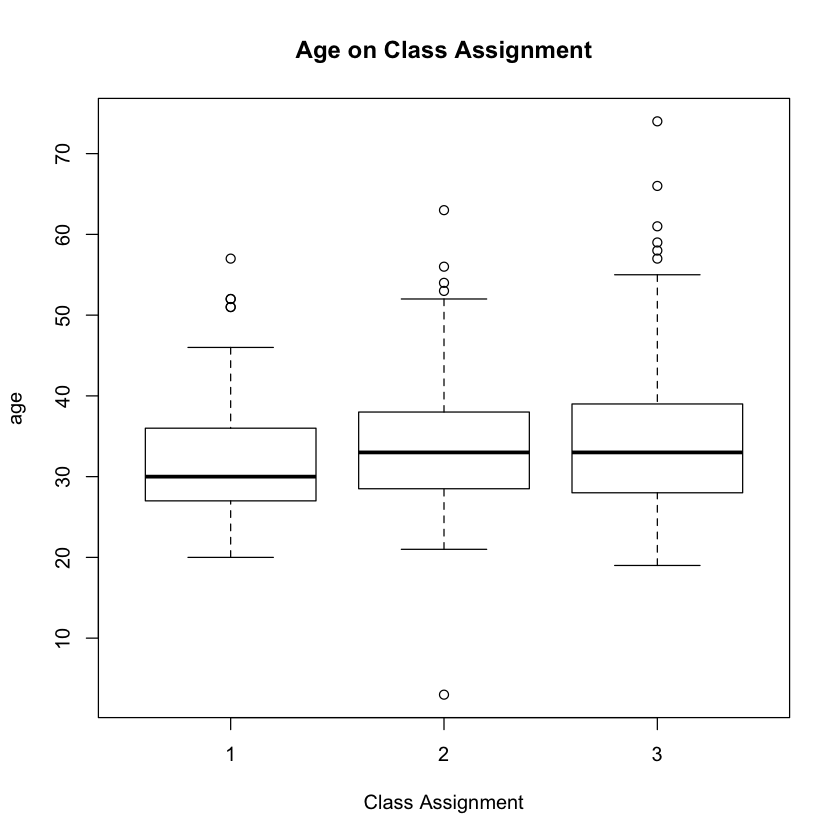

In [24]:
boxplot(age~predictions,data = inferenceFrame,ylab = "age",
        xlab = "Class Assignment",
        main = "Age on Class Assignment")

_Figure 2: Age on Class Assignment._

We see little relation between age of the worker and the class assignment. That being said, it looks like the the inter-quartile range (IQR) for class $1$ is shifted slightly lower than the IQRs for classes $2$ and $3$.

In [25]:
#then recode gender (i.e. a social construct)
genderFrame = read.csv("../../data/preprocessed/genderCountFrame.csv")
colnames(genderFrame)[1] = "gender"
genderFrame$count = NULL
#merge the two datasets
inferenceFrame = merge(inferenceFrame,genderFrame,by = "gender")

In [26]:
inferenceFrame$gender = inferenceFrame$genderMap
inferenceFrame$genderMap = NULL

In [27]:
genderPredictTable = table(inferenceFrame$gender,inferenceFrame$predictions)
genderPredictTable

   
      1   2   3
  M 118 104 206
  O   4   1   5
  W  24  31  80

_Table 15: encoded gender on class assignment._

We see that

$$P(2 | M) = \frac{104}{118 + 104 + 206} = 24.30\%$$

and

$$P(2 | W) = \frac{24}{24 + 31 + 80} = 22.96\%.$$

These are pretty close together, which may suggest that the perception of high support is of equal proportion in the men and women populations. That being said, we would need to do more formal testing to check this assumption. We also see that

$$P(3 | M) = \frac{206}{118 + 104 + 206} \approx 48.13\%$$

and that

$$P(3 | W) = \frac{80}{24 + 31 + 80} = 59.26\%$$

This is a sizable effect to consider. In particular, it would suggest that women are more likely to feel poorly supported on mental health in the industry than men.

In [84]:
inferenceFrame$companySize[is.na(inferenceFrame$companySize)] = (
                            "Self-Employed")

In [28]:
table(inferenceFrame$companySize,inferenceFrame$predictions)

                
                  1  2  3
  1-5            12  3 17
  100-500        29 31 58
  26-100         44 39 74
  500-1000       11 11 15
  6-25           34 13 48
  More than 1000 16 39 79

_Table 16: company size on class assignment._

Given the many levels of this variable, it is currently difficult to find a real effect in this.

In [29]:
table(inferenceFrame$diagnosedWithMHD,inferenceFrame$predictions)

     
        1   2   3
  No  101  66 125
  Yes  45  70 166

_Table 17: Diagnosed with Mental Health Condition on class assignment._

We see that

$$P(2|No) = \frac{66}{101 + 66 + 125} = 22.6\%$$

and

$$P(2|Yes) = \frac{70}{45 + 70 + 166} = 24.91\%.$$

These rates are actually rather close, which suggests to me that ```diagnosedWithMHD``` is not going to do a great job at predicting class $2$ assignment.

We also see that

$$P(3|No) = \frac{125}{101 + 66 + 125} \approx 42.81\%$$

and that

$$P(3|Yes) = \frac{166}{45 + 70 + 166} \approx 59.07\%.$$

This is where ```diagnosedWithMHD``` is having some effect. In particular, it suggests that individuals diagnosed with a mental health condition are somewhat more likely to feel a sense of low support over mental health in the industry than those who don't have a mental health condition. While this is somewhat unsurprising, it is a real policy concern that we need to be considering when developing implications.

## Simple Modeling

Let us try a slightly more informed manner of relating demographic variables to our class assignment.

1. We will attempt to fit a multinomial classifier for our class assignment over our studied demographic variables. We will select the variables of this multinomial classifier using a forward-backward selection procedure over $AIC.$ This will start with the only-intercept model and build out to an upper-bound of an all-interactions model.

2. We will also fit a decision tree to this dataset.

3. Whichever model performs the best on the inference set will be our selected model for study. This method has slight limitations because we do not optimize our model for out-of-sample prediction. Nonetheless, since we have limited amounts of data left, it did not make sense to me to perform another data split on the inference set.

In [30]:
lowerBoundForm = "factor(predictions)~1"
#then make upperbound
upperBoundModVec = c()
#get all interaction levels available
for (gender in c(TRUE,FALSE)){
    for (isUSA in c(TRUE,FALSE)){
        for (companySize in c(TRUE,FALSE)){
            for (age in c(TRUE,FALSE)){
                for (diagnosedWithMHD in c(TRUE,FALSE)){
                    givenTermVec = c()
                    if (gender){
                        givenTermVec = c(givenTermVec,"factor(gender)")
                    }
                    if (companySize){
                        givenTermVec = c(givenTermVec,"factor(companySize)")
                    }
                    if (isUSA){
                        givenTermVec = c(givenTermVec,"factor(isUSA)")
                    }
                    if (age){
                        givenTermVec = c(givenTermVec,"age")
                    }
                    if (diagnosedWithMHD){
                        givenTermVec = c(givenTermVec,
                                         "factor(diagnosedWithMHD)")
                    }
                    #then paste these all
                    givenTerm = paste(givenTermVec,collapse = ":")
                    if (givenTerm != ""){
                        upperBoundModVec = c(upperBoundModVec,givenTerm)
                    }
                }
            }
        }
    }
}
#then get upper bound form
upperBoundForm = paste(upperBoundModVec,collapse = "+")
upperBoundForm = paste0("factor(predictions)~",upperBoundForm)

In [31]:
#then do stepwise regression for class 1
baseMod = multinom(lowerBoundForm,data = inferenceFrame)
upperMod = multinom(upperBoundForm,data = inferenceFrame)
finalClassMod.mc = step(baseMod,scope = list(lower = baseMod,upper = upperMod),
                   data = inferenceFrame,direction = "both")

# weights:  6 (2 variable)
initial  value 629.504841 
final  value 592.392815 
converged
# weights:  435 (288 variable)
initial  value 629.504841 
iter  10 value 542.813163
iter  20 value 528.191198
iter  30 value 523.061233
iter  40 value 519.381562
iter  50 value 514.007613
iter  60 value 504.123795
iter  70 value 494.024810
iter  80 value 488.361278
iter  90 value 480.803739
iter 100 value 473.311798
final  value 473.311798 
stopped after 100 iterations
Start:  AIC=1188.79
factor(predictions) ~ 1

trying + factor(gender) 
# weights:  12 (6 variable)
initial  value 629.504841 
iter  10 value 588.161831
final  value 588.161351 
converged
trying + factor(isUSA) 
# weights:  9 (4 variable)
initial  value 629.504841 
final  value 578.266817 
converged
trying + factor(companySize) 
# weights:  21 (12 variable)
initial  value 629.504841 
iter  10 value 578.688966
final  value 576.574040 
converged
trying + age 
# weights:  9 (4 variable)
initial  value 629.504841 
final  value 586.852717 


In [32]:
summary(finalClassMod.mc)$call$formula

factor(predictions) ~ factor(isUSA) + factor(diagnosedWithMHD) + 
    age + factor(companySize) + factor(diagnosedWithMHD):age
<environment: 0x7f8b3a56de98>

_Figure 3: Our final model for the multinomial classifier._

We see that our model considers $isUSA$, $age$, $companySize$, $diagnosedWithMHD$, and the interaction between $companySize$ and $diagnosedWithMHD$ in the final model. This slightly surprising given the sizable gender effect discovered in the previous step. I may still want to include this variable in our final model in order to build upon the gender effect discovered [in my previous analysis](https://medium.com/@tfluffm/data-and-mental-health-the-osmi-survey-2016-39a3d308ac2f).

In [33]:
#try a decision tree
finalClassMod.tree = tree(factor(predictions) ~ factor(isUSA) + age +
                                        factor(gender) + factor(companySize)
                                          + factor(diagnosedWithMHD),
                                          data = inferenceFrame)

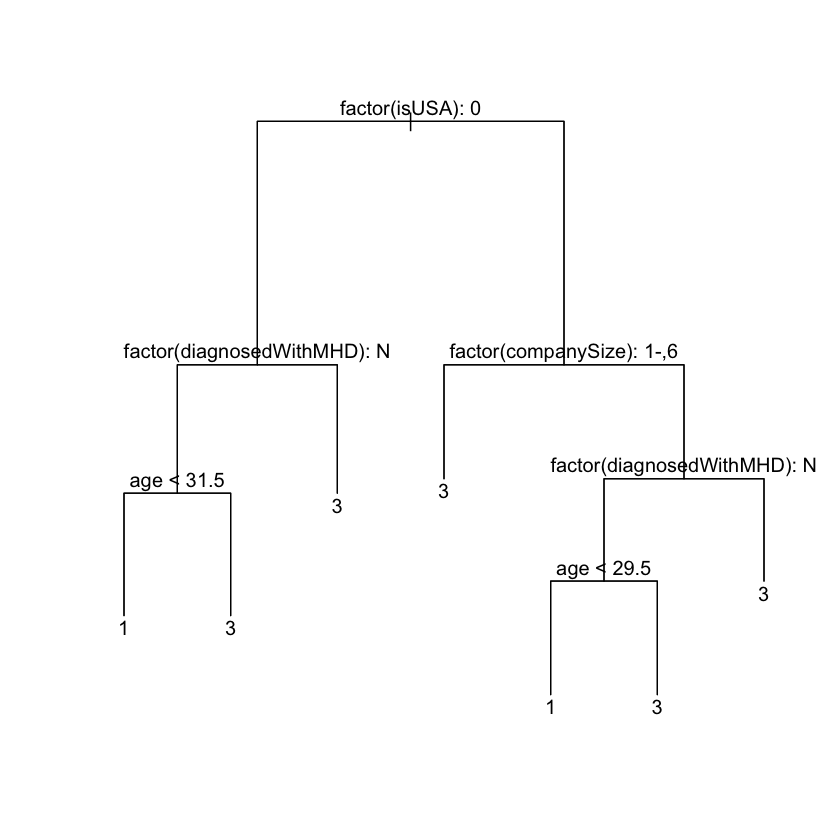

In [34]:
plot(finalClassMod.tree)
text(finalClassMod.tree,pretty = TRUE)

_Figure 4: Our final Decision Tree Model._

We see that our decision tree seems to never predict if an individual is assigned to class assignment 2. This is a strong suggestion that we have an imbalanced classes issue that our current decision tree is having issues picking up. Like our multinomial logistic regression, `age`, `companySize`, `isUSA`, and `diagnosedWithMHD` seems to occur.

In [35]:
#check predictions of both
mClassPredictions = predict(finalClassMod.mc)
treePredictions = predict(finalClassMod.tree,type = "class")
actualPredictions = inferenceFrame$predictions

In [36]:
#get accuracy
numAccurate.mc = length(
                actualPredictions[(actualPredictions == mClassPredictions)])
numAccurate.tree = length(
                actualPredictions[(actualPredictions == treePredictions)])
propAccurate.mc = numAccurate.mc / length(actualPredictions)
propAccurate.tree = numAccurate.tree / length(actualPredictions)
print(paste("The proportion accurate for the multinomial",
            "classifier is:",signif(propAccurate.mc,sigLev)))
print(paste("The proportion accurate for the decision tree is:",
            signif(propAccurate.tree,sigLev)))

[1] "The proportion accurate for the multinomial classifier is: 0.529"
[1] "The proportion accurate for the decision tree is: 0.546"


We are talking about an accuracy difference of less than $2\%$. They are both not amazing models, but the multinomial classifier at least will predict the class assignment of $2$ at particular points. Thus, I would argue that we should use the multinomial classifier for our class assignment. On a similar note, I would also like to include `gender` as a variable in the final class model in order to ensure an analysis of the gender effect.

In [37]:
finalClassMod = multinom(factor(predictions) ~ factor(isUSA) 
                         + factor(diagnosedWithMHD) + age + factor(companySize)
                         + factor(diagnosedWithMHD):age + gender,
                         data = inferenceFrame)
saveRDS(finalClassMod,"../../models/finalClusterAssignmentClassifier.rds")

# weights:  39 (24 variable)
initial  value 629.504841 
iter  10 value 553.400489
iter  20 value 545.415446
final  value 545.344600 
converged


## Inference and Preditions

Let's first get a measure of accuracy with the new `gender` variable included.

In [38]:
classPredictions = predict(finalClassMod)
numAccurate = length(actualPredictions[(actualPredictions == classPredictions)])
propAccurate = numAccurate / length(actualPredictions)
print(paste("The proportion accurate for the multinomial",
            "classifier is:",signif(propAccurate,sigLev)))

[1] "The proportion accurate for the multinomial classifier is: 0.541"


It looks like including the `gender` variable increased our accuracy on the inference set slightly, but it doesn't look to have a meaningful effect on accuracy.

In [39]:
inferenceFrame$classAssignment = inferenceFrame$predictions
inferenceFrame$predictedAssignment = predict(finalClassMod)

In [40]:
#let's make our confusion matrix
confusionMat = matrix(0,nrow = 3,ncol = 3)
for (i in 1:3){
    for (j in 1:3){
        levFrame = inferenceFrame[(inferenceFrame$predictedAssignment == i
                                 & inferenceFrame$classAssignment == j),]
        numAtLev = dim(levFrame)[1]
        confusionMat[i,j] = numAtLev
    }
}
#then name columns and rows
rownames(confusionMat) = c("Predict 1","Predict 2","Predict 3")
colnames(confusionMat) = c("Actual 1","Actual 2","Actual 3")
confusionMat

,Actual 1,Actual 2,Actual 3
Predict 1,54,10,36
Predict 2,3,4,3
Predict 3,89,122,252


_Table 18: Our Confusion Matrix for our Final Model._

We see by our confusion matrix that

$$P(Correct | Actual(1)) = \frac{54}{54 + 3 + 89} \approx 36.97\%,$$

$$P(Correct | Actual(2)) = \frac{4}{10 + 4 + 122} \approx 2.94\%,$$

and

$$P(Correct | Actual(3)) = \frac{252}{36 + 3 + 252} \approx 86.6\%.$$

Thus, we can see that our model is doing a pretty good job at predicting people in class assignment $3$, but generally not doing a great job at predicting classes $1$ and $2$. This is rather expected, since Class $3$ is a much larger group of individuals than classes $2$ and $1$. This is what we would call an imbalanced classes problem in the literature.

In [54]:
coefficientTable = summary(finalClassMod)$coefficients
coefficientTable = t(coefficientTable)
#shift around some variable levels for company size
companyLowerLev = 5
companyUpperLev = 9
shiftVec = c(8,6,5,7,9)
coefficientTable[companyLowerLev:companyUpperLev,] = (
                    coefficientTable[shiftVec,])
rownames(coefficientTable)[companyLowerLev:companyUpperLev] = (
                                       rownames(coefficientTable)[shiftVec])
#then print out table
coefficientTable = signif(coefficientTable,sigLev)
coefficientTable

,2,3
(Intercept),-4.2900,-2.17000
factor(isUSA)1,1.0200,0.44000
factor(diagnosedWithMHD)Yes,4.4000,3.23000
age,0.0666,0.05970
factor(companySize)6-25,0.3490,-0.03120
factor(companySize)26-100,1.0600,0.03470
factor(companySize)100-500,1.2500,0.16300
factor(companySize)500-1000,1.3500,-0.00414
factor(companySize)More than 1000,1.9400,0.96200
genderO,-1.1900,-0.40700


_Table 19: Our Coefficient Table For our Multinomial Classifier._

There are quite a few effects to consider here.

### Location Effect

We see that ```isUSA``` has a class 2 effect estimate of $1.02$, which means that given all else constant, an individual working in the US is predicted to on average be $e^{1.02} \approx 2.77$ times as likely to be associated with class $2$ than an individual not working in the US. We are thus predicting that an individual working in the US is $177\%$ more likely to feel highly supported on mental health care in the workplace than an individual not working within the US. This at first seems promising, until we realize that since the base-likelihood of being in class $2$ is so small (see Intercept) That we are likely only estimating a relatively weak effect here.

### Age and Diagnosis Effect

### Company Size

### Gender

### Point Predictions

Let's try to gather some point predictions for various levels we would like to consider given an average-aged individual, let's see our predictions for a US worker at various levels of gender and diagnosis for a large tech firm (e.g. Google, Facebook)

In [70]:
#make relevant vectors for our data frame
diagLev = c("Yes","No","Yes","No","Yes","No")
genderLev = c("W","W","O","O","M","M")
avgAge = signif(mean(inferenceFrame$age),sigLev)
#then make our prediction frame
predictFrame = data.frame(diagnosedWithMHD = diagLev,
                          gender = genderLev,isUSA = 1,age = avgAge,
                          companySize = "More than 1000")
#make our predictions
predictions = predict(finalClassMod,newdata = predictFrame,type = "probs")
predictions = signif(predictions,sigLev - 1)
#then export taht to a reasonable-looking data frame
predictFrame$classOneProb = predictions[,1]
predictFrame$classTwoProb = predictions[,2]
predictFrame$classThreeProb = predictions[,3]
predictFrame

diagnosedWithMHD,gender,isUSA,age,companySize,classOneProb,classTwoProb,classThreeProb
Yes,W,1,33.6,More than 1000,0.058,0.28,0.67
No,W,1,33.6,More than 1000,0.120,0.30,0.58
Yes,O,1,33.6,More than 1000,0.120,0.19,0.69
No,O,1,33.6,More than 1000,0.250,0.19,0.57
Yes,M,1,33.6,More than 1000,0.069,0.34,0.59
No,M,1,33.6,More than 1000,0.140,0.36,0.50


_Table 20: Predictions for US workers at large firms for various levels of gender and diagnosis._

We see that across the board, those who are diagnosed with a mental health diagnosis are predicted to be much more likely to be in class $3$ than those who are not diagnosed. We also notice that we are predicting a slightly higher class $2$ assignment for men than for women.

Let's see what this looks like for a recent college graduate (i.e. $22$ years old).

In [71]:
predictFrame$age = 22
#make our predictions
predictions = predict(finalClassMod,newdata = predictFrame,type = "probs")
predictions = signif(predictions,sigLev - 1)
#then export taht to a reasonable-looking data frame
predictFrame$classOneProb = predictions[,1]
predictFrame$classTwoProb = predictions[,2]
predictFrame$classThreeProb = predictions[,3]
predictFrame

diagnosedWithMHD,gender,isUSA,age,companySize,classOneProb,classTwoProb,classThreeProb
Yes,W,1,22,More than 1000,0.046,0.36,0.59
No,W,1,22,More than 1000,0.220,0.25,0.53
Yes,O,1,22,More than 1000,0.100,0.26,0.64
No,O,1,22,More than 1000,0.400,0.14,0.46
Yes,M,1,22,More than 1000,0.054,0.44,0.51
No,M,1,22,More than 1000,0.260,0.30,0.45


_Table 21: Predictoins for recent college graduates in the US at large firms for various levels of diagnosis and gender._

We see a general increase